HOUSE PRICING COMPETITION

In [303]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
pd.set_option('display.max_rows',None)

In [265]:
train_raw = pd.read_csv("data/input/train.csv")
test_raw = pd.read_csv("data/input/test.csv")

In [266]:
train_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [267]:
train_raw.shape

(1460, 81)

Histogram of Price in train data.

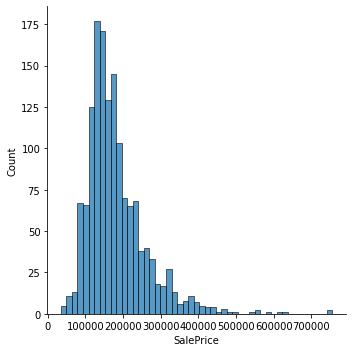

In [268]:
sns.displot(train_raw['SalePrice'])

In the abovementioned Figure we notice skewness of the output variable SalePrice (absence of symmetry from the mean of the dataset). Also we notice that Kurtosis is high - distribution is more peaked than the normal distribution. Numerical values for these two parameters are:

In [269]:
print("Skewness : %f" % train['SalePrice'].skew())
print("Kurtosis : %f" % train['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


Next we will plot correlation matrix.

In [270]:
corr = train_raw.corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [271]:
print("Train data NaN values:")
print(train_raw.isna().sum())
print("\nTest data NaN values:")
print(test_raw.isna().sum())

Train data NaN values:
Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF 

Text(0.5, 1.0, 'Test data heatmap')

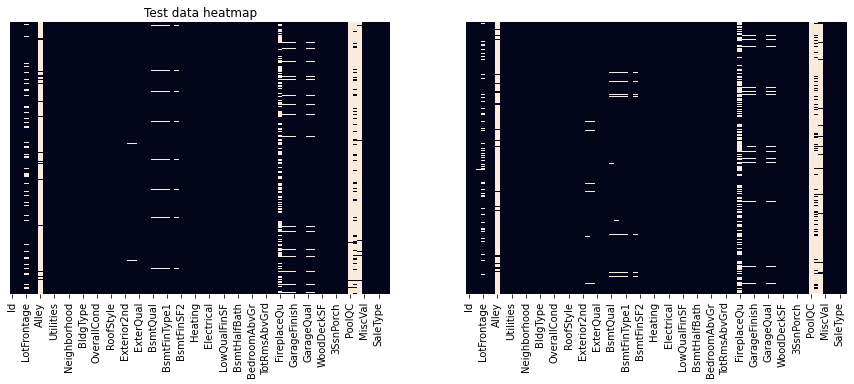

In [272]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.heatmap(train_raw.isna(), yticklabels=False, cbar=False, ax=axes[0])
axes[0].set_title("Train data heatmap")

sns.heatmap(test_raw.isna(), yticklabels=False, cbar=False, ax=axes[1])
axes[0].set_title("Test data heatmap")

Let us examine types of columns.

In [273]:
print("Feature types in train data:")
print(train_raw.dtypes)

Feature types in train data:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        in

Feature types of NaN data.

In [274]:
print("Feature types of NaN in train data:")
print(train_raw.head())
print(train_raw.loc[:, train_raw.isna().any()].head())

Feature types of NaN in train data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleConditio

## Feature engineering

Before feature engineering we are going to create to variables train and test to save train_raw and test_raw intact if we needed them somewhere along the analysis.

In [275]:
train = pd.read_csv("data/input/train.csv")
test = pd.read_csv("data/input/test.csv")

Now we generate a function for droping columns with high number of NaN values, as well as high-cardinality columns.

In [276]:
def drop_feature(df, col):
    df.drop([col], axis=1, inplace=True)

In [277]:
cols = ["Id", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]
for col in cols:
    drop_feature(train, col)
    drop_feature(test, col)

In [278]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


After removing features with high number of NaN values we will try to fill other NaN values in train and test data. For categorical variables we will use mode and for numeric variables we will use mean.

In [279]:
def fill_mode(df, col):
    df[col]=df[col].fillna(df[col].mode()[0])

In [280]:
def fill_mean_meadian(df, col):
    df[col]=df[col].fillna(df[col].mean())

According to our analysis in train data we have 19 columns with NaN values and they are different types. First we will use simple Imputations with mode-categorical variables and mean-numerical variables.

In [281]:

nan_cols_train = [i for i in train.columns if train[i].isnull().any()]
nan_cols_test = [i for i in test.columns if test[i].isnull().any()]

nan_dataset_train = train[nan_cols_train]
nan_dataset_test = train[nan_cols_test]

nan_dataset_train_categorical = nan_dataset_train.loc[:, nan_dataset_train.dtypes == object]
nan_dataset_test_categorical = nan_dataset_test.loc[:,nan_dataset_test.dtypes == object]

nan_dataset_train_numerical = nan_dataset_train.loc[:, nan_dataset_train.dtypes != object]
nan_dataset_test_numerical = nan_dataset_test.loc[:,nan_dataset_test.dtypes != object]

We will Impute categorical variables of both train and test dataset with mode. 

Numerical variables are going to be imputed with mean.

In [282]:
for col in nan_dataset_train_categorical:
    fill_mode(train, col)

for col in nan_dataset_test_categorical:
    fill_mode(test, col)

for col in nan_dataset_train_numerical:
    fill_mean_meadian(train, col)

for col in nan_dataset_test_numerical:
    fill_mean_meadian(test, col)

Checking are there any missing values in train or test datasets.

In [283]:
train.isna().sum().sum()
test.isna().sum().sum()

0

We will group some features that might provide a good information together. With this we will reduce number of our features.

In [284]:
train['Bsmt'] = (train['BsmtQual'] + train['BsmtCond']) 
test['Bsmt'] = (test['BsmtQual'] + test['BsmtCond']) 

train['Garage'] = (train['GarageQual'] + train['GarageCond']) 
test['Garage'] = (test['GarageQual'] + test['GarageCond']) 

train['External'] = (train['ExterQual'] + train['ExterCond']) 
test['External'] = (test['ExterQual'] + test['ExterCond'])

train['Total_Bathrooms'] = (train['FullBath'] + (0.5*train['HalfBath']) + train['BsmtFullBath'] + (0.5*train['BsmtHalfBath']))

test['Total_Bathrooms'] = (test['FullBath'] + (0.5*test['HalfBath']) + test['BsmtFullBath'] + (0.5*test['BsmtHalfBath']))

train['TotalSF'] = (train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'])
test['TotalSF'] = (test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF'])

cols = ["BsmtQual", "BsmtCond", "GarageQual", "GarageCond", "ExterQual", "ExterCond", "FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF"]
for col in cols:
    drop_feature(train, col)
    drop_feature(test, col)

Next step is encoding categorical variables.

In [294]:
print(test.loc[:, test.dtypes == object].nunique())
print(len(train.select_dtypes(exclude=[np.number]).columns))

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         1
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        5
BldgType          5
HouseStyle        7
RoofStyle         6
RoofMatl          4
Exterior1st      13
Exterior2nd      15
MasVnrType        4
Foundation        6
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           4
HeatingQC         5
CentralAir        2
Electrical        4
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
PavedDrive        3
SaleType          9
SaleCondition     6
Bsmt             14
Garage           12
External         15
dtype: int64
35


In [297]:

cols = (train.select_dtypes(exclude=[np.number]).columns)

# process columns, apply LabelEncoder to categorical features
for col in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[col].values)) 
    train[col] = lbl.transform(list(train[col].values))
    lbl.fit(list(test[col].values)) 
    test[col] = lbl.transform(list(test[col].values))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'SaleType', 'SaleCondition', 'Bsmt', 'Garage',
       'External'],
      dtype='object')


# Model

In [317]:
y = np.log(train.SalePrice)

X = train.drop(['SalePrice'], axis=1)

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Linear Regression

In [319]:

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
print('The accuracy of the Linear Regression is',r2_score(y_test,y_pred))
print ('RMSE is: \n', mean_squared_error(y_test, y_pred))

The accuracy of the Linear Regression is 0.8847119732491123
RMSE is: 
 0.020008885654209316


In [320]:
xg_reg = xgb.XGBRegressor(learning_rate =0.01, n_estimators=3460, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective= 'reg:squarederror',nthread=4,
                                     scale_pos_weight=1,seed=27, 
                                     reg_alpha=0.00006)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
print('The accuracy of the xgboost is',r2_score(y_test,preds))
print ('RMSE is: \n', mean_squared_error(y_test,preds))

The accuracy of the xgboost is 0.9126051128319064
RMSE is: 
 0.015167874352532857


In [325]:
submission = pd.DataFrame()
submission['Id'] = test_raw.Id
final_predictions = xg_reg.predict(test)
submission['SalePrice'] = np.expm1(final_predictions) 
submission.to_csv('data/output/submission1.csv', index=False)